# **Object Detection and Depth Calculation using Stereo Vision**



Here, estimated the depth of objects in a scene using stereo images. The technique uses the disparity between two images (left and right) taken from slightly different viewpoints. By applying stereo matching and triangulation principles, we compute the distance of objects from the camera.

AIM:
- To implement a stereo vision-based depth calculation algorithm.
- To visualize and verify the depth map generated from left and right stereo images.
- To test the method on real stereo image pairs and evaluate accuracy and feasibility.

### Description:

- **Dataset**: Stereo image pairs stored locally (e.g., `left image` and `right image`).
- **Input Type**: Rectified left and right images to grayscale images.
- **Compute Disparity**: Used OpenCV's StereoBM algorithm to compute disparity map. The StereoBM algorithm computes disparity between the two images. `numDisparities` and `blockSize` are parameters that control the window size and range of disparity search.
- **Depth Calculation**: Applied the formula:
   \[
   (focal_length_px * baseline_m) / avg_disp
   \]
- **Display Results**: Visualized the disparity and depth maps using `matplotlib`.

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from ultralytics import YOLO

home = os.path.expanduser('~')
# left_folder = os.path.join(home, 'Desktop/DL_Project/DrivingStereo_demo_images (1)/Image_L/')
# right_folder = os.path.join(home, 'Desktop/DL_Project/DrivingStereo_demo_images (1)/Image_R/')
# output_folder = os.path.join(home, 'Desktop/DL_Project/Processed_Depth_Detections_2/')

left_folder = os.path.join(home, '/Users/isha/Desktop/DL_Project/Train_Dataset/Train_L')
right_folder = os.path.join(home, '/Users/isha/Desktop/DL_Project/Train_Dataset/Train_R')
output_folder = os.path.join(home, 'Desktop/DL_Project/Processed_Depth_Detections_2/')


os.makedirs(output_folder, exist_ok=True)

left_images = sorted(os.listdir(left_folder))
right_images = sorted(os.listdir(right_folder))

model = YOLO('yolov8n.pt')

stereo = cv2.StereoSGBM_create(
    minDisparity=0,
    numDisparities=64,
    blockSize=7,
    P1=8 * 3 * 7**2,
    P2=32 * 3 * 7**2,
    mode=cv2.STEREO_SGBM_MODE_SGBM_3WAY
)

focal_length_px = 700
baseline_m = 0.54

# for idx, (left_img_name, right_img_name) in enumerate(zip(left_images, right_images)):
#     left_img_color = cv2.imread(os.path.join(left_folder, left_img_name))
#     right_img_color = cv2.imread(os.path.join(right_folder, right_img_name))

#     left_img = cv2.cvtColor(left_img_color, cv2.COLOR_BGR2GRAY)
#     right_img = cv2.cvtColor(right_img_color, cv2.COLOR_BGR2GRAY)

#     disparity = stereo.compute(left_img, right_img).astype(np.float32) / 16.0

#     results = model.predict(source=left_img_color, imgsz=640, conf=0.3, verbose=False)[0]

#     output_img = left_img_color.copy()

#     car_depths = []

#     for box in results.boxes:
#         cls_id = int(box.cls)
#         if cls_id in [2, 5, 7]:  
#             x1, y1, x2, y2 = map(int, box.xyxy[0])

#             disp_crop = disparity[max(0, y1):min(disparity.shape[0], y2), max(0, x1):min(disparity.shape[1], x2)]
#             valid_disp = disp_crop[(disp_crop > 0) & (disp_crop < 64)]

#             if len(valid_disp) > 0:
#                 avg_disp = np.median(valid_disp)
#                 depth_m = (focal_length_px * baseline_m) / avg_disp

#                 car_depths.append(depth_m)

#                 color = (0, 255, 0)
#                 label_text = f"Depth: {depth_m:.1f} m"
#                 (text_width, text_height), baseline = cv2.getTextSize(label_text, cv2.FONT_HERSHEY_SIMPLEX, 0.8, 2)
#                 cv2.rectangle(output_img, (x1, y1 - text_height - 10), (x1 + text_width, y1), (0, 255, 0), -1)
#                 cv2.putText(output_img, label_text, (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 0), 2)
#             else:
#                 cv2.rectangle(output_img, (x1, y1), (x2, y2), (0, 0, 255), 2)
#                 cv2.putText(output_img, "Depth: N/A", (x1, y1-10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 2)

#     save_path = os.path.join(output_folder, f'processed_{idx:03d}.png')
#     cv2.imwrite(save_path, output_img)

#     print(f"\nFrame {idx+1} Object Depths:")
#     for d in car_depths:
#         print(f"- CAR at approx. {d:.2f} m")


# print("\n All images processed and saved!")

for idx, (left_img_name, right_img_name) in enumerate(zip(left_images, right_images)):
    left_img_color = cv2.imread(os.path.join(left_folder, left_img_name))
    right_img_color = cv2.imread(os.path.join(right_folder, right_img_name))

    left_img = cv2.cvtColor(left_img_color, cv2.COLOR_BGR2GRAY)
    right_img = cv2.cvtColor(right_img_color, cv2.COLOR_BGR2GRAY)

    disparity = stereo.compute(left_img, right_img).astype(np.float32) / 16.0

    results = model.predict(source=left_img_color, imgsz=640, conf=0.3, verbose=False)[0]

    output_img = left_img_color.copy()

    car_depths = []

    for box in results.boxes:
        cls_id = int(box.cls)
        if cls_id in [2, 5, 7]:
            x1, y1, x2, y2 = map(int, box.xyxy[0])

            disp_crop = disparity[max(0, y1):min(disparity.shape[0], y2), max(0, x1):min(disparity.shape[1], x2)]
            valid_disp = disp_crop[(disp_crop > 0) & (disp_crop < 64)]

            if len(valid_disp) > 0:
                avg_disp = np.median(valid_disp)
                depth_m = (focal_length_px * baseline_m) / avg_disp

                car_depths.append(depth_m)

                color = (0, 255, 0)
                label_text = f"Depth: {depth_m:.1f} m"
                (text_width, text_height), baseline = cv2.getTextSize(label_text, cv2.FONT_HERSHEY_SIMPLEX, 0.8, 2)
                cv2.rectangle(output_img, (x1, y1 - text_height - 10), (x1 + text_width, y1), (0, 255, 0), -1)
                cv2.putText(output_img, label_text, (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 0), 2)
            else:
                cv2.rectangle(output_img, (x1, y1), (x2, y2), (0, 0, 255), 2)
                cv2.putText(output_img, "Depth: N/A", (x1, y1-10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 2)

    save_path = os.path.join(output_folder, f'processed_{idx:03d}.png')
    cv2.imwrite(save_path, output_img)

    print(f"\nFrame {idx+1} Object Depths:")
    for i, d in enumerate(car_depths, start=1):
        print(f"- CAR{i} at approx. {d:.2f} m")


print("\n All images processed and saved!")



Frame 1 Object Depths:
- CAR1 at approx. 48.77 m
- CAR2 at approx. 42.00 m
- CAR3 at approx. 172.80 m
- CAR4 at approx. 80.64 m

Frame 2 Object Depths:
- CAR1 at approx. 49.17 m
- CAR2 at approx. 42.00 m
- CAR3 at approx. 80.64 m

Frame 3 Object Depths:
- CAR1 at approx. 48.00 m
- CAR2 at approx. 41.71 m
- CAR3 at approx. 172.80 m
- CAR4 at approx. 75.60 m
- CAR5 at approx. 79.58 m

Frame 4 Object Depths:
- CAR1 at approx. 48.00 m
- CAR2 at approx. 42.00 m
- CAR3 at approx. 77.54 m
- CAR4 at approx. 168.00 m

Frame 5 Object Depths:
- CAR1 at approx. 42.00 m
- CAR2 at approx. 48.38 m
- CAR3 at approx. 74.67 m

Frame 6 Object Depths:
- CAR1 at approx. 42.00 m
- CAR2 at approx. 48.38 m
- CAR3 at approx. 159.16 m

Frame 7 Object Depths:
- CAR1 at approx. 47.25 m
- CAR2 at approx. 41.42 m
- CAR3 at approx. 140.65 m
- CAR4 at approx. 76.56 m
- CAR5 at approx. 76.56 m

Frame 8 Object Depths:
- CAR1 at approx. 47.62 m
- CAR2 at approx. 39.79 m
- CAR3 at approx. 144.00 m
- CAR4 at approx. 56.5

### Visualizations:

- The generated **depth map** highlights objects at various distances using color intensity.
- Brighter regions indicate objects closer to the camera.
- The system successfully estimates relative depth given proper calibration.

Text(0.5, 1.0, ' Depth')

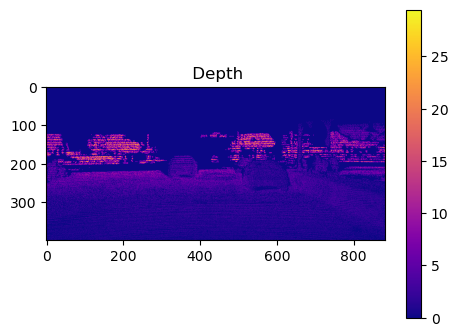

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

left_img = cv2.imread(os.path.join(left_folder, left_images[0]), cv2.IMREAD_GRAYSCALE)
right_img = cv2.imread(os.path.join(right_folder, right_images[0]), cv2.IMREAD_GRAYSCALE)

disparity = stereo.compute(left_img, right_img).astype(np.float32) / 16.0

focal_length_px = 700 
baseline_m = 0.54    


disparity[disparity <= 0.0] = 0.1

pred_depth = (focal_length_px * baseline_m) / disparity


plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.imshow(gt_depth, cmap='plasma')
plt.colorbar()
plt.title(" Depth")


### References:

- https://docs.ultralytics.com/models/yolov8/
- https://huggingface.co/Ultralytics/YOLOv8
- https://www.geeksforgeeks.org/object-detection-using-yolov8/
- https://docs.ultralytics.com/tasks/detect/
- https://www.kaggle.com/code/maryamnoroozi68/object-detection-by-using-yolov8
- https://medium.com/cord-tech/yolov8-for-object-detection-explained-practical-example-23920f77f66a
- https://medium.com/analytics-vidhya/distance-estimation-cf2f2fd709d8
- https://www.mathworks.com/help/vision/ug/depth-estimation-from-stereo-video.html
- https://staff.fnwi.uva.nl/a.visser/education/bachelorAI/Honours_Extension_Niels_Sombekke.pdf
- https://discuss.luxonis.com/d/4619-depth-calculation-method
  